# Task 4  of Sparks Foundation internship

Using Decision Tree Classifier to predict the class of the given iris dataset and visualizing it accordingly

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1 = df[df.Species=='Iris-virginica']
df2 = df[df.Species=='Iris-setosa']
df3 = df[df.Species=='Iris-versicolor']

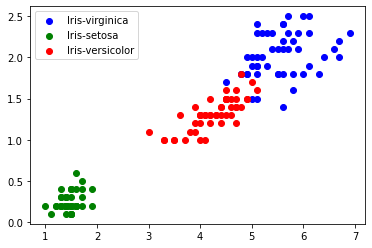

In [5]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue',label='Iris-virginica')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green',label='Iris-setosa')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='red',label='Iris-versicolor')
plt.legend();

In [6]:
le_Species=LabelEncoder()
df['Species'] = le_Species.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
jd=df.drop(['Id','Species'],axis='columns',inplace=False)

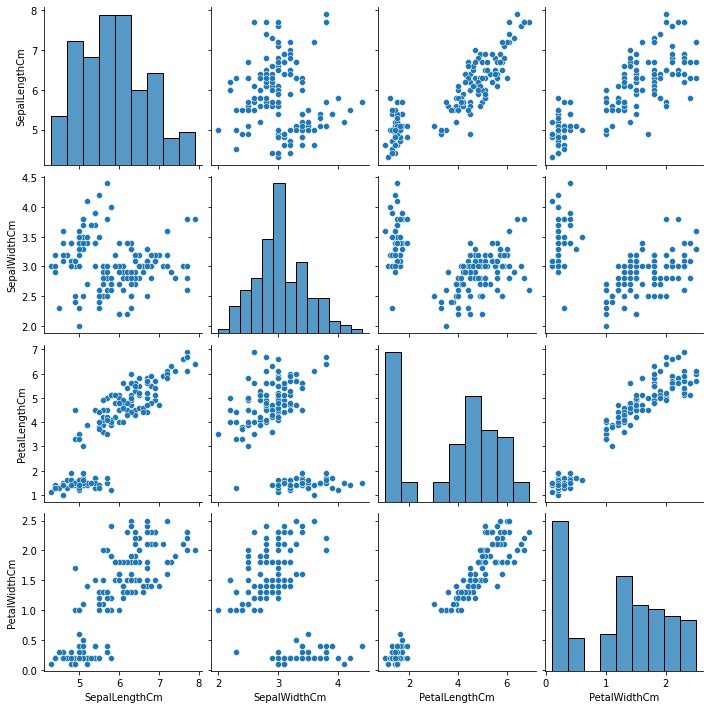

In [8]:
sns.pairplot(jd)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(jd,df.Species,test_size=0.2,random_state =4)

In [10]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
pred=model.predict(X_test)
pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [12]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, pred)  
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

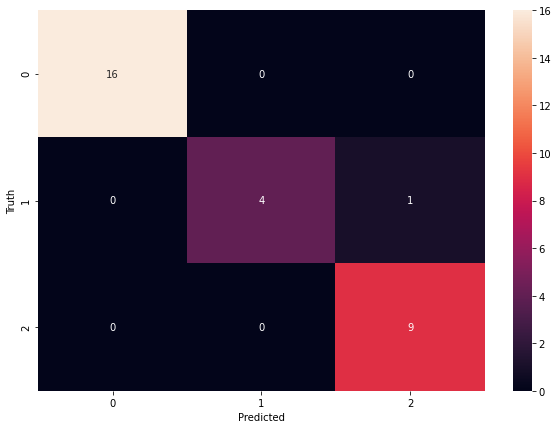

In [13]:
#Visualizing the Answer
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

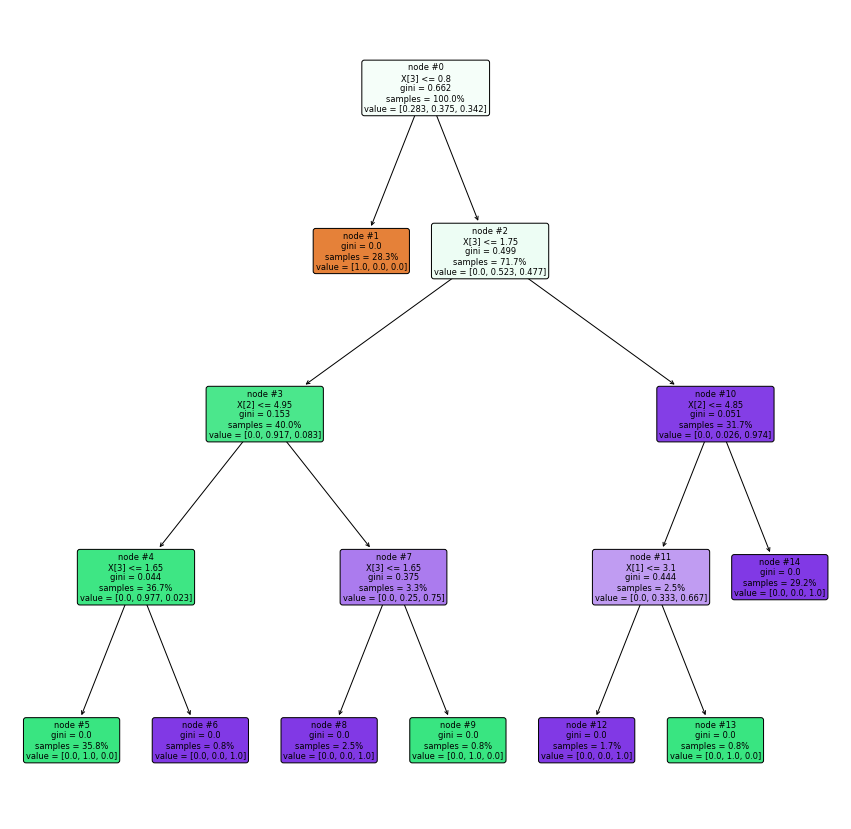

In [14]:
plt.figure(figsize  = (15,15))
tree.plot_tree(model,filled = True,rounded = True,proportion = True,node_ids = True)
plt.show()

In [15]:
print(tree.export_text(model))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [16]:
model.score(X_test,y_test)

0.9666666666666667

In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
accuracy

0.9666666666666667